In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
k = 20
LAMBDA = 0.1
lr = 0.02
MAX_ITERS = 40
training_file = 'ratings.train.txt'
openfile = open(training_file, 'r')

min_user_id = 1000000000
max_user_id = -1000000000
min_item_id = 1000000000
max_item_id = -1000000000

for line in openfile:
  user_id, item_id, rating = list(int(x) for x in line.strip().split("\t"))

  if user_id < min_user_id: min_user_id = user_id
  if user_id > max_user_id: max_user_id = user_id
  if item_id < min_item_id: min_item_id = item_id
  if item_id > max_item_id: max_item_id = item_id

In [ ]:
Q = np.random.rand(max_item_id, k) * 0.5
P = np.random.rand(max_user_id, k) * 0.5

Iteration = []
E_list = []

for iter in range(MAX_ITERS):
  openfile.seek(0)
  for line in openfile:
    u, i, r = list(int(x) for x in line.strip().split("\t"))
    u -= 1
    i -= 1
    epsilon_iu = 2 * (r - Q[i] @ P[u].T)
    Q_i_new = Q[i] + lr * (epsilon_iu * P[u] - 2 * LAMBDA * Q[i])
    P_u_new = P[u] + lr * (epsilon_iu * Q[i] - 2 * LAMBDA * P[u])
    Q[i] = Q_i_new
    P[u] = P_u_new

  openfile.seek(0)
  E = 0
  for line in openfile:
    u, i, r = list(int(x) for x in line.strip().split("\t"))
    u -= 1
    i -= 1
    E += (r - Q[i] @ P[u].T) ** 2
  E += LAMBDA * (np.sum(P ** 2) + np.sum(Q ** 2))
  E_list.append(E)
  Iteration.append(iter + 1)
  print("Iteration {}, error E is: {}".format(iter + 1, E))

Iteration 1, error E is: 88465.28317924593
Iteration 2, error E is: 86631.42167632809
Iteration 3, error E is: 84034.14437651816
Iteration 4, error E is: 80688.89847157191
Iteration 5, error E is: 77604.57021507598
Iteration 6, error E is: 74651.52011214384
Iteration 7, error E is: 71820.8843328883
Iteration 8, error E is: 69270.44571664394
Iteration 9, error E is: 67083.90277628263
Iteration 10, error E is: 65249.93573775429
Iteration 11, error E is: 63719.06816418372
Iteration 12, error E is: 62438.760798897085
Iteration 13, error E is: 61363.91829806421
Iteration 14, error E is: 60457.70158630893
Iteration 15, error E is: 59690.18125509664
Iteration 16, error E is: 59036.979011404954
Iteration 17, error E is: 58478.20845950729
Iteration 18, error E is: 57997.64924283865
Iteration 19, error E is: 57582.07939097029
Iteration 20, error E is: 57220.72416688349
Iteration 21, error E is: 56904.79904012075
Iteration 22, error E is: 56627.13219643725
Iteration 23, error E is: 56381.85491818

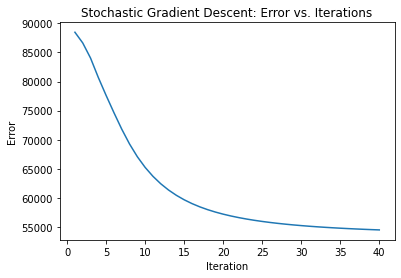

In [ ]:
plt.figure()
plt.plot(Iteration, E_list)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Stochastic Gradient Descent: Error vs. Iterations')
plt.savefig('q3.png')
plt.show()